In [51]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [52]:
#importing the data
data = pd.read_csv("marketing_1.csv", parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
data.shape

(10037, 12)

In [54]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}

data['channel_code'] = data['subscribing_channel'].map(channel_dict)

# Adding new column is_correct_lang
data['is_correct_lang'] = np.where(data['language_preferred'] == data['language_displayed'], 'Yes', 'No')

In [55]:
# Add a DoW column
data['DoW'] = data['date_subscribed'].dt.dayofweek
data.head()

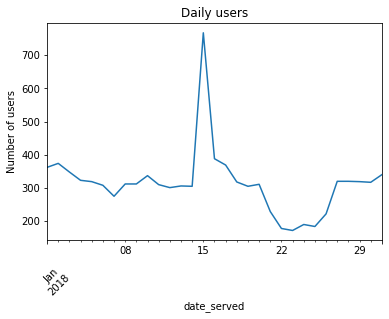

In [58]:
#How many users see our marketing assets each day (to see the effectiveness)
daily_users = data.groupby(['date_served'])['user_id'].nunique() 

#let's visualize daily users for better interpretation
daily_users.plot()

plt.title('Daily users')
plt.ylabel('Number of users')
plt.xticks(rotation=45)

plt.show()

In [59]:
#calculating conversion rate (the percentage of the users who saw our marketing assets and subsequently became subscribers)
# Number of people who convert/Total number of people who we market to

total = data["user_id"].nunique()
subscribers = data[data['converted']== True]['user_id'].nunique()
conversion_rate = round((subscribers/total)*100, 2)
print(f"Conversion rate: {conversion_rate} %")

Conversion rate: 13.89 %


Conversion rate and retention rate function hand-in-hand; you could create a business with a high conversion rate by giving users a free trial, but have a low retention rate once users are charged for your services. This isn't inherently a bad thing, but it is important to provide your business stakeholders with insight into what percentage of users remain subscribers.

In [60]:
# Number of people who remain subscribed/Total number of people who converted

retained = data[data['is_retained']== True]['user_id'].nunique()
retention_rate = round((retained/subscribers)*100, 2)
print(f"Retention rate: {retention_rate} %")

Retention rate: 66.8 %


The marketing team wants to determine how effective the campaign was on converting English speakers.

In [61]:
english_speakers = data[data['language_displayed'] == 'English']
total = english_speakers['user_id'].nunique()
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [62]:
# function to calculate convertion rate with grouping by columns
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [63]:
#checking if marketing campaign was more sucessful in other languages
language_conversion_rate = conversion_rate(data,'language_displayed')

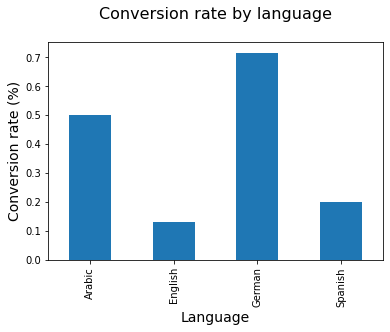

In [64]:
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

The marketing team wants to know whether there is any difference in the conversion rate based on when in the month, your users saw an ad.

In [65]:
total = data.groupby('date_served')['user_id'].nunique()
subscribers = data[data["converted"]==True].groupby('date_served')['user_id'].nunique()

# conversion rate per day
daily_conversion_rate = subscribers/total
#print(daily_conversion_rate)

In [66]:
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

daily_conversion_rate.columns = ['date_subscribed', 'conversion_rate']

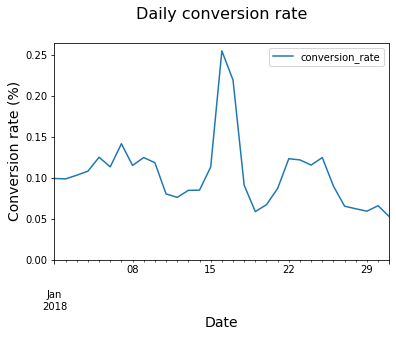

In [67]:
#Let's plot daily convertion rate
daily_conversion_rate.plot('date_subscribed', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)
plt.show()

Our marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

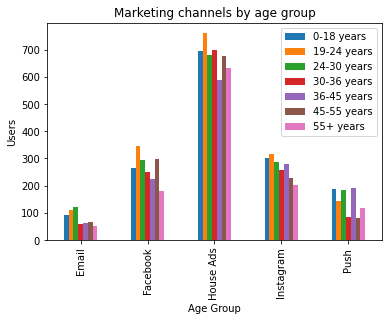

In [68]:
channel_age = data.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [69]:
# Count the subs by subscribing channel and day
retention_total = data.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [70]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = data[data['is_retained']==True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
retention_subs.head()

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64

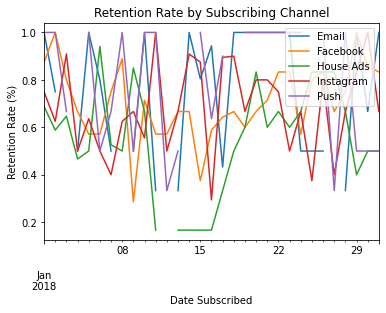

In [71]:
# 
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

retention_rate_df.plot()

plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right', labels = retention_rate_df.columns)
plt.show()

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


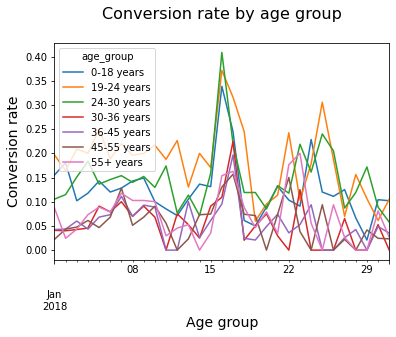

In [72]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(data, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [73]:
#function to plot daily convertion rate
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        
        plt.show()  
        plt.clf()

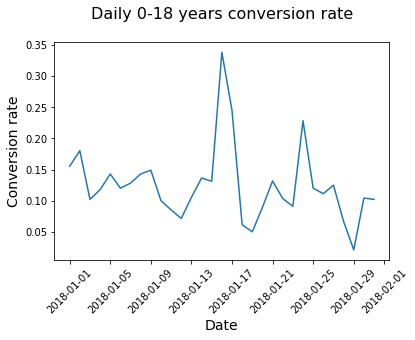

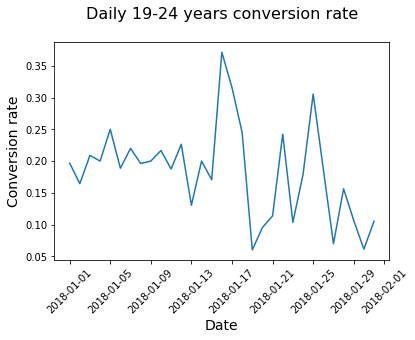

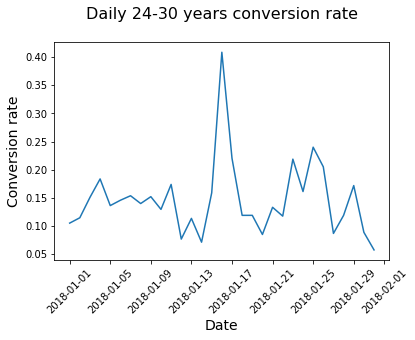

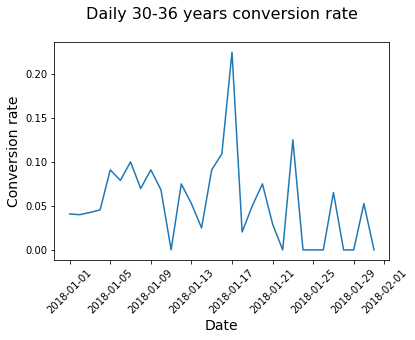

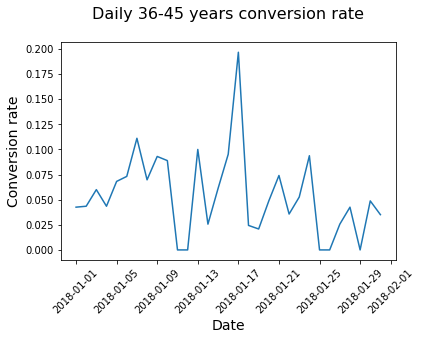

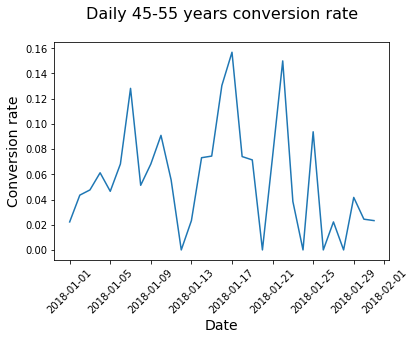

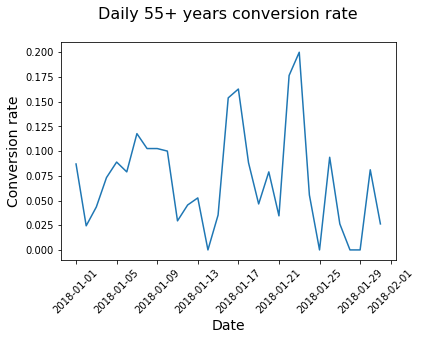

<Figure size 432x288 with 0 Axes>

In [74]:
# Calculating conversion rate by date served and age group
age_group_conv = conversion_rate(data,['date_served','age_group'])
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

plotting_conv(age_group_df)

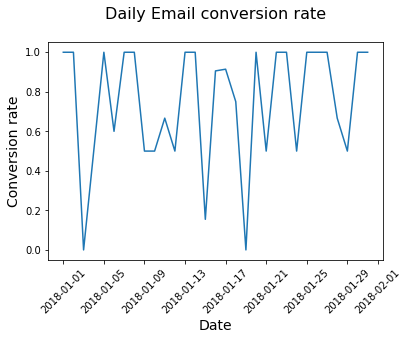

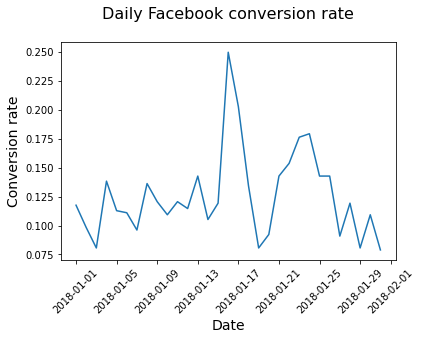

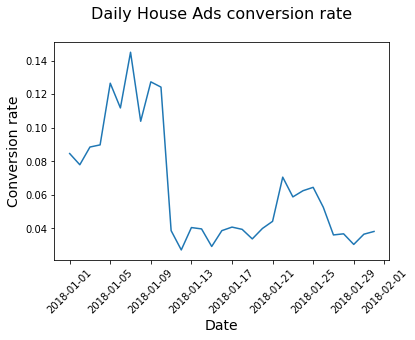

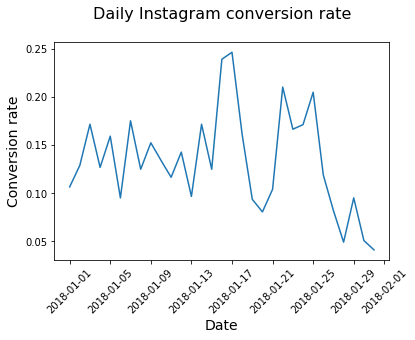

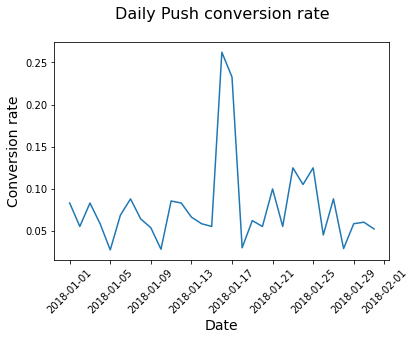

<Figure size 432x288 with 0 Axes>

In [75]:
daily_conv_channel = conversion_rate(data, ['date_served', 'marketing_channel'])
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

plotting_conv(daily_conv_channel)

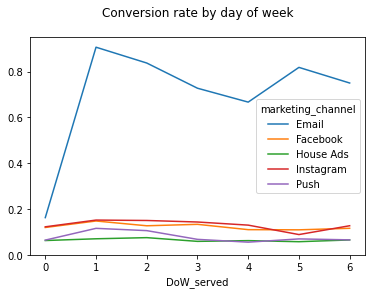

In [76]:
# Adding day of week column to marketing
data['DoW_served'] = data['date_served'].dt.dayofweek

# Calculating conversion rate by day of week
DoW_conversion = conversion_rate(data, ['DoW_served', 'marketing_channel'])
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

Email is particularly high and may be reflective of a tracking error.

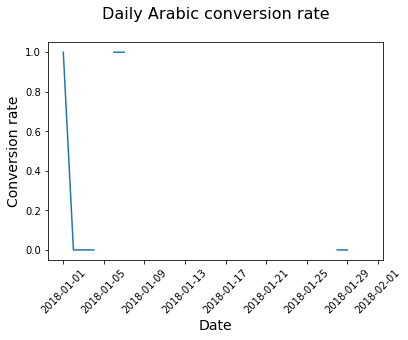

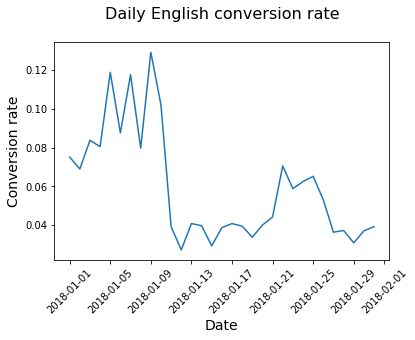

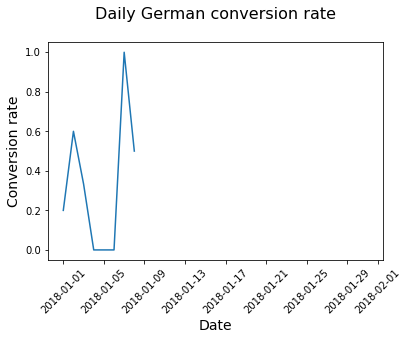

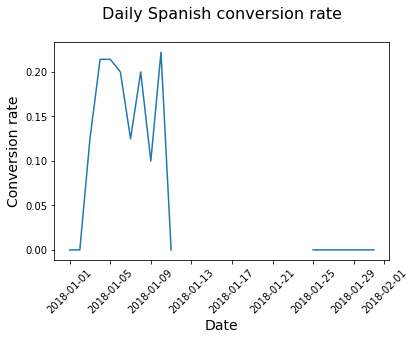

<Figure size 432x288 with 0 Axes>

In [77]:
#Let's explore House ads as they were decreasing after 11th of January
house_ads = data[data["marketing_channel"]=='House Ads']

# Calculating conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

plotting_conv(conv_lang_df)

The English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

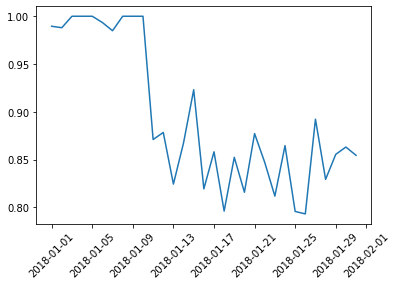

In [78]:

language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation=45)
plt.show()


House ads have been underperforming due to serving all ads in English rather than each user's preferred language. And now I would like to figure out how many subscribers we lost as a result of this bug.

In [79]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug,['language_displayed'])                         
# Index other language conversion rate against English
spanish_index = lang_conv["Spanish"]/lang_conv['English']
arabic_index = lang_conv["Arabic"]/lang_conv['English']
german_index = lang_conv["German"]/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [80]:
# house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique','converted':'sum'})

converted_df = pd.DataFrame(converted.unstack(level=1))
converted_df.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

In [81]:
# English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted', 'English')]

# Expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate'] * spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate'] * arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate'] * german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df[('user_id','Spanish')]*converted_df['expected_spanish_rate']/100
converted_df['expected_arabic_conv'] = converted_df[('user_id','Arabic')]*converted_df['expected_arabic_rate']/100
converted_df['expected_german_conv'] = converted_df[('user_id','German')]*converted_df['expected_german_rate']/100

In [82]:
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


32 subscribers may not seem like many, but for a small company this can be vitally important, especially when expanding to new markets.

## AB testing for Marketing.

In [83]:
marketing_ab = pd.read_csv("marketing_new.csv")

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

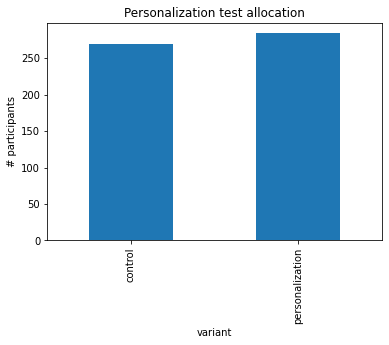

In [84]:
email = marketing_ab[marketing_ab["marketing_channel"]=='Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [85]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id','variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


Personalization users converted at a higher rate than the control. 
Let's calculate lift and statistical significance.

**Lift = (Treatment Conv Rate - Control conv rate)/Control conv rate**

In [86]:
def lift(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)

    lift = (b_mean - a_mean)/a_mean
    return str(round(lift*100, 2)) + '%'

print(lift(control, personalization))

38.85%


In [87]:
t = ttest_ind(control, personalization)
print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


P-value less than 0.05 is a statistically significant, which means our personalization results are highly statistically significant.

In [88]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing_ab[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing_ab[(marketing_ab['marketing_channel'] == 'Email') & (marketing_ab[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization)) 
      print('t-statistic:', ttest_ind(control, personalization), '\n\n')

In [89]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [90]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




Personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.